In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.linear_model import LassoCV
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df=pd.read_csv('sudeste.csv')

In [4]:
df

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779163,423,BARUERI,777.0,-23.523890,-46.869450,A755,Barueri,SP,2016-09-30 19:00:00,2016-09-30,...,18.2,12.4,16.3,11.8,76.0,77.0,67.0,0.0,0.0,0.0
9779164,423,BARUERI,777.0,-23.523890,-46.869450,A755,Barueri,SP,2016-09-30 20:00:00,2016-09-30,...,16.8,12.5,15.3,11.7,80.0,80.0,75.0,0.0,0.0,0.0
9779165,423,BARUERI,777.0,-23.523890,-46.869450,A755,Barueri,SP,2016-09-30 21:00:00,2016-09-30,...,15.3,11.9,14.9,11.5,79.0,81.0,79.0,0.0,0.0,0.0
9779166,423,BARUERI,777.0,-23.523890,-46.869450,A755,Barueri,SP,2016-09-30 22:00:00,2016-09-30,...,15.0,11.7,14.4,11.4,82.0,83.0,79.0,0.0,0.0,0.0


In [5]:
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns',31)
#pd.set_option('display.max_rows',9779168)

In [6]:
df.drop(columns=['wsnm','city','inme','mdct','prov','elvt','lat','lon'],inplace=True)
df = df.fillna(0)

In [7]:
for i in range(24):
    df['hr'].replace({i:str(i)+":00:00"},inplace=True)

df['date'] =  pd.to_datetime(df['date'])
df['date'] = df['date'] + pd.to_timedelta(df['hr'])

In [8]:
id310=df.loc[df['wsid'] == 310]
id310

,wsid,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
665952,310,2008-06-22 00:00:00,2008,6,22,0:00:00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665953,310,2008-06-22 01:00:00,2008,6,22,1:00:00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665954,310,2008-06-22 02:00:00,2008,6,22,2:00:00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665955,310,2008-06-22 03:00:00,2008,6,22,3:00:00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665956,310,2008-06-22 04:00:00,2008,6,22,4:00:00,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738499,310,2016-09-30 19:00:00,2016,9,30,19:00:00,0.0,995.2,995.2,994.7,999.190,28.2,17.4,30.5,17.5,27.9,16.6,52.0,53.0,45.0,6.1,101.0,10.7
738500,310,2016-09-30 20:00:00,2016,9,30,20:00:00,0.0,995.9,995.9,995.1,461.521,25.9,17.2,28.2,17.4,25.9,17.0,59.0,59.0,52.0,6.0,110.0,10.1
738501,310,2016-09-30 21:00:00,2016,9,30,21:00:00,0.0,996.5,996.5,995.9,15.462,24.2,17.1,25.9,17.3,24.2,17.1,65.0,65.0,59.0,5.4,115.0,10.1
738502,310,2016-09-30 22:00:00,2016,9,30,22:00:00,0.0,997.7,997.7,996.5,0.000,23.1,17.7,24.2,17.8,23.1,17.0,72.0,72.0,65.0,4.6,122.0,9.4


In [9]:
timeFrame = (id310['date'] >= '2014-01-01') & (id310['date'] <= '2015-12-31')
id310=id310.loc[timeFrame]
id310=id310.set_index('date')
id310.drop(columns=['yr','mo','da','hr','wsid'],inplace=True)

In [10]:
 for i in id310:
    id310=id310[(np.abs(stats.zscore(id310[i])) < 3)]

In [11]:
id310.corr()[['temp']].sort_values('temp')

,temp
hmdy,-0.866201
hmin,-0.850125
hmax,-0.833308
stp,-0.491982
smin,-0.472863
smax,-0.454714
wdct,-0.282693
prcp,-0.075708
dmin,0.028194
dewp,0.124899


In [12]:
predictors=['hmdy','hmin','hmax','gbrd','tmin','tmax']
df2=id310[['temp']+predictors]
df2

,temp,hmdy,hmin,hmax,gbrd,tmin,tmax
date,,,,,,,
2014-01-01 00:00:00,23.9,87.0,83.0,87.0,0.000,23.8,24.7
2014-01-01 01:00:00,23.4,85.0,85.0,88.0,0.000,23.3,23.9
2014-01-01 02:00:00,22.3,88.0,84.0,88.0,0.000,22.3,23.4
2014-01-01 03:00:00,21.3,92.0,88.0,92.0,0.000,21.3,22.4
2014-01-01 04:00:00,21.3,93.0,92.0,93.0,0.000,21.1,21.6
...,...,...,...,...,...,...,...
2015-12-30 20:00:00,31.3,52.0,37.0,52.0,1009.850,31.3,34.5
2015-12-30 21:00:00,29.0,61.0,52.0,61.0,323.367,29.0,31.3
2015-12-30 22:00:00,26.7,71.0,61.0,71.0,6.455,26.7,29.0


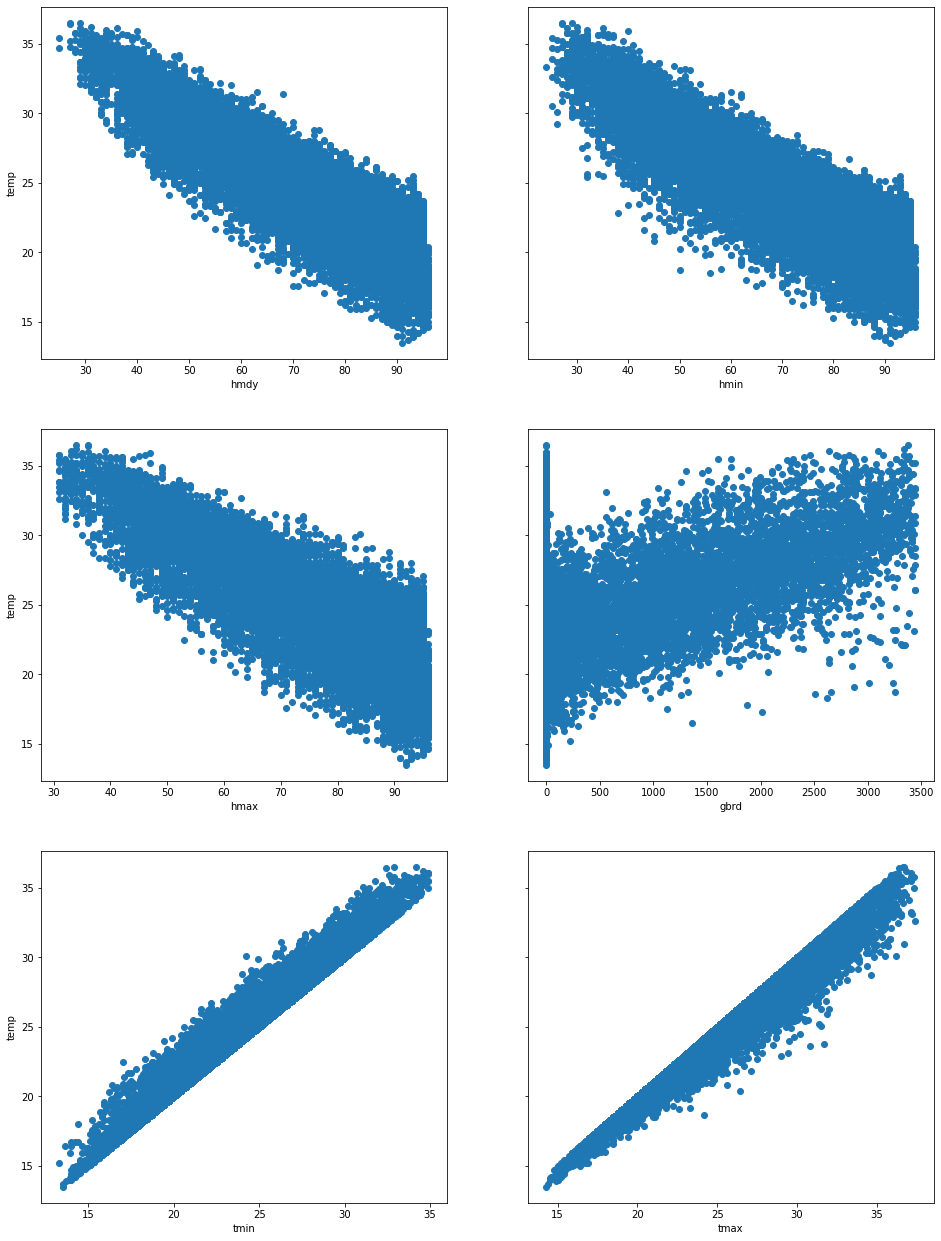

In [13]:
plt.rcParams['figure.figsize'] = [16, 22]
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True)
arr = np.array(predictors).reshape(3,2)

for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [14]:
X=df2[:13998] #training data
X_train = X[['hmdy','hmin','hmax','gbrd','tmin','tmax']] #independant
Y_train=X[['temp']] #dependant

X1=df2[13998:] #testing data
X_test = X1[['hmdy','hmin','hmax','gbrd','tmin','tmax']] #independant
Y_test= X1[['temp']] #dependant

In [15]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

LinearRegression()

In [16]:
y_pred = regr.predict(X_test)
regr.score(X_test,Y_test)

0.9937139844664828

In [17]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.23648514818292649
Mean Squared Error:  0.10553331825356634
Root Mean Squared Error:  0.3248589205386953


In [19]:
Y_test.loc[:,1]=y_pred
Y_test

C:\Users\nayan\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,temp,1
date,,
2015-08-31 08:00:00,18.4,18.192997
2015-08-31 09:00:00,18.3,18.333633
2015-08-31 10:00:00,20.2,19.591738
2015-08-31 11:00:00,23.1,22.856535
2015-08-31 12:00:00,24.9,24.932835
...,...,...
2015-12-30 20:00:00,31.3,31.491729
2015-12-30 21:00:00,29.0,29.287969
2015-12-30 22:00:00,26.7,26.927171
